In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df = pd.read_csv("data.csv")

C:\Users\Rasengan\AppData\Local\Temp\ipykernel_14384\3422652871.py:2: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,26,27,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv")


In [45]:
id_columns = [
    "FOD_ID",
    "FPA_ID",
    "NWCG_REPORTING_UNIT_ID",
    "SOURCE_REPORTING_UNIT",
    "LOCAL_FIRE_REPORT_ID",
    "LOCAL_INCIDENT_ID",
    "FIRE_CODE",
    "ICS_209_PLUS_INCIDENT_JOIN_ID",
    "ICS_209_PLUS_COMPLEX_JOIN_ID",
    "MTBS_ID",
    "FIPS_CODE",
    "MTBS_FIRE_NAME",
    "COMPLEX_NAME",
    "NWCG_CAUSE_AGE_CATEGORY",
    "Shape"
]
df_cleaned = df.drop(columns=id_columns)
df_cleaned.shape

(2303566, 24)

In [46]:
# df_cleaned = df_cleaned[df_cleaned["FIRE_YEAR"] >= 2000]
state_fire_counts = df_cleaned['STATE'].value_counts(normalize=True)
total_sample_size = 200000
state_sample_sizes = (state_fire_counts * total_sample_size).round().astype(int)
df_sampled = df_cleaned.groupby('STATE').apply(
    lambda x: x.sample(n=min(len(x), state_sample_sizes[x.name]), random_state=42)
).reset_index(drop=True)
df_sampled.shape

C:\Users\Rasengan\AppData\Local\Temp\ipykernel_14384\3403554508.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df_cleaned.groupby('STATE').apply(


(200001, 24)

In [65]:
df_sampled = df_sampled.dropna(subset=['CONT_DOY', 'DISCOVERY_DOY', 'FIRE_SIZE'])

df_sampled['DURATION_DAYS'] = df_sampled['CONT_DOY'] - df_sampled['DISCOVERY_DOY']

df_plot = df_sampled[
    (df_sampled['DURATION_DAYS'] > 0) & (df_sampled['DURATION_DAYS'] <= 50) &
    (df_sampled['FIRE_SIZE'] > 0) & (df_sampled['FIRE_SIZE'] <= 100)
]

df_plot = df_plot[['DURATION_DAYS', 'FIRE_SIZE', "NWCG_REPORTING_AGENCY"]]

df_plot.to_json(f'wildfires_{total_sample_size}_for_plot.json', orient="records", mode="w")

In [66]:
df_plot.head()

,DURATION_DAYS,FIRE_SIZE,NWCG_REPORTING_AGENCY
1,5.0,0.7,ST/C&L
2,39.0,20.0,BLM
3,1.0,8.0,ST/C&L
5,4.0,0.1,ST/C&L
9,2.0,0.3,ST/C&L


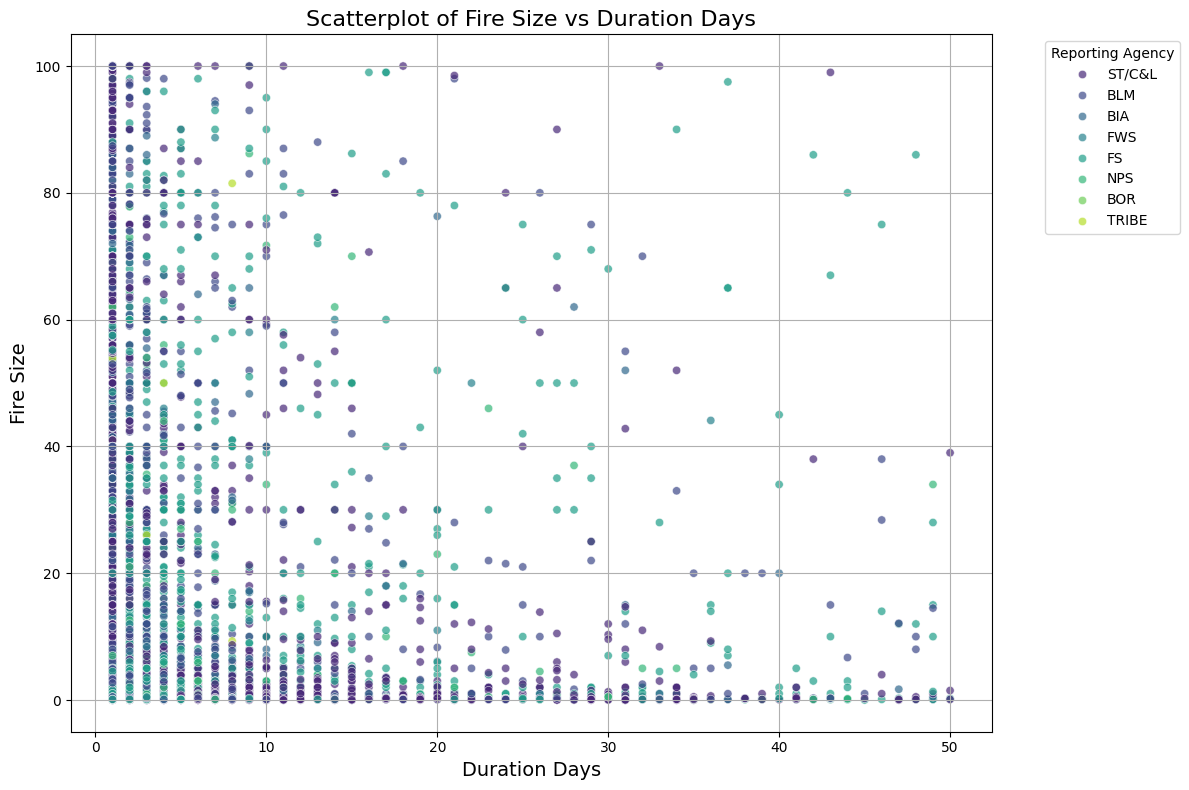

In [67]:
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(
    data=df_plot,
    x='DURATION_DAYS',
    y='FIRE_SIZE',
    hue='NWCG_REPORTING_AGENCY',
    palette='viridis',  # You can choose a different color palette if desired
    alpha=0.7           # Adjust transparency for better visualization
)

# Add labels and title
plt.title('Scatterplot of Fire Size vs Duration Days', fontsize=16)
plt.xlabel('Duration Days', fontsize=14)
plt.ylabel('Fire Size', fontsize=14)
plt.legend(title='Reporting Agency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()